<a href="https://colab.research.google.com/github/Precious3ita/Top-spotify-listening/blob/main/Copy_of_Data_scraping_and_NLP_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import re

In [ ]:
url = "https://fzmovie.co.za/"

In [ ]:
page = requests.get(url)
page

<Response [200]>

In [ ]:
page.content

b'<!doctype html>\n<html lang="en-US" prefix="og: https://ogp.me/ns#" class="no-js" itemtype="https://schema.org/Blog" itemscope>\n<head>\n\t<meta charset="UTF-8">\n\t<meta name="viewport" content="width=device-width, initial-scale=1, minimum-scale=1">\n\t\t<style>img:is([sizes="auto" i], [sizes^="auto," i]) { contain-intrinsic-size: 3000px 1500px }</style>\n\t\n<!-- Search Engine Optimization by Rank Math - https://rankmath.com/ -->\n<title>Fzmovies</title>\n<meta name="description" content="Discover a treasure trove of movies on Fzmovies 2025. From the latest blockbusters to timeless classics, enjoy high-quality viewing experiences. fzmoviez"/>\n<meta name="robots" content="follow, index"/>\n<link rel="canonical" href="https://fzmovie.co.za/" />\n<link rel="next" href="https://fzmovie.co.za/page/2/" />\n<meta property="og:locale" content="en_US" />\n<meta property="og:type" content="website" />\n<meta property="og:title" content="Fzmovies 2025" />\n<meta property="og:description" con

In [ ]:
soup = BeautifulSoup(page.content, "html.parser")
print(soup.prettify())

<!DOCTYPE html>
<html class="no-js" itemscope="" itemtype="https://schema.org/Blog" lang="en-US" prefix="og: https://ogp.me/ns#">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1, minimum-scale=1" name="viewport"/>
  <style>
   img:is([sizes="auto" i], [sizes^="auto," i]) { contain-intrinsic-size: 3000px 1500px }
  </style>
  <!-- Search Engine Optimization by Rank Math - https://rankmath.com/ -->
  <title>
   Fzmovies
  </title>
  <meta content="Discover a treasure trove of movies on Fzmovies 2025. From the latest blockbusters to timeless classics, enjoy high-quality viewing experiences. fzmoviez" name="description">
   <meta content="follow, index" name="robots">
    <link href="https://fzmovie.co.za/" rel="canonical"/>
    <link href="https://fzmovie.co.za/page/2/" rel="next"/>
    <meta content="en_US" property="og:locale"/>
    <meta content="website" property="og:type"/>
    <meta content="Fzmovies 2025" property="og:title"/>
    <meta conten

In [ ]:
scraped_movies = soup.find_all('div', class_="ultp-block-content")
scraped_movies

[<div class="ultp-block-content"><h2 class="ultp-block-title"><a href="https://fzmovie.co.za/a-line-of-fire-2025/">A Line of Fire (2025)</a></h2></div>,
 <div class="ultp-block-content"><h2 class="ultp-block-title"><a href="https://fzmovie.co.za/forgive-us-all-2025/">Forgive Us All (2025)</a></h2></div>,
 <div class="ultp-block-content"><h2 class="ultp-block-title"><a href="https://fzmovie.co.za/the-naked-gun-2025/">The Naked Gun (2025)</a></h2></div>,
 <div class="ultp-block-content"><h2 class="ultp-block-title"><a href="https://fzmovie.co.za/bang-2025/">Bang (2025)</a></h2></div>,
 <div class="ultp-block-content"><h2 class="ultp-block-title"><a href="https://fzmovie.co.za/twisted-metal-season-2/">Twisted Metal (Season 2)</a></h2></div>,
 <div class="ultp-block-content"><h2 class="ultp-block-title"><a href="https://fzmovie.co.za/fatal-seduction-season-2/">Fatal Seduction (Season 2)</a></h2></div>,
 <div class="ultp-block-content"><h2 class="ultp-block-title"><a href="https://fzmovie.c

In [ ]:
# parse movie names
movies = []
for movie in scraped_movies:
  title_tag = movie.find(['h2', 'h3'], class_="ultp-block-title")
  if title_tag:
    movies.append(title_tag.get_text().replace('\n',"").lower())

display(movies)

['a line of fire (2025)',
 'forgive us all (2025)',
 'the naked gun (2025)',
 'bang (2025)',
 'twisted metal (season 2)',
 'fatal seduction (season 2)',
 'adulting (season 3)',
 'cop & a half (2025)',
 'youngins (season 2)',
 'sibongile & the dlaminis (s01)',
 'my brother’s keeper (s02)',
 'my brother’s keeper (s01)',
 'isibaya (season 2)',
 'isibaya (season 1)',
 'the river (season 4)',
 'the river (season 3)',
 'diepcity (season 2)',
 'diepcity (season 1)',
 'izingane zes’thembu (season 2)',
 'shaka ilembe (season 2) (episode 11 added)',
 'marked (season 1)',
 'shaka ilembe (season 1)',
 'cop & a half (2025)',
 'izingane zes’thembu (season 1)',
 'a line of fire (2025)',
 'forgive us all (2025)',
 'twisted metal (season 2)',
 'everybody loves jenifa (2024)',
 'tehran (2025)',
 'noise (2025)',
 'the thursday murder club (2025)',
 'the naked gun (2025)',
 'freakier friday (2025)',
 'oh, hi! (2025)',
 'she rides shotgun (2025)',
 'bang (2025)',
 'night of the werewolves (2025)',
 'i know

In [ ]:
# store the scraped data

data = pd.DataFrame()
data['Movie Name'] = movies
data.head()

,Movie Name
0,a line of fire (2025)
1,forgive us all (2025)
2,the naked gun (2025)
3,bang (2025)
4,twisted metal (season 2)


In [ ]:
data.to_csv('Fzmovies.csv', index=False)

In [ ]:
wt_movies = [sentence.split() for sentence in movies]
wt_movies[:50]

[['a', 'line', 'of', 'fire', '(2025)'],
 ['forgive', 'us', 'all', '(2025)'],
 ['the', 'naked', 'gun', '(2025)'],
 ['bang', '(2025)'],
 ['twisted', 'metal', '(season', '2)'],
 ['fatal', 'seduction', '(season', '2)'],
 ['adulting', '(season', '3)'],
 ['cop', '&', 'a', 'half', '(2025)'],
 ['youngins', '(season', '2)'],
 ['sibongile', '&', 'the', 'dlaminis', '(s01)'],
 ['my', 'brother’s', 'keeper', '(s02)'],
 ['my', 'brother’s', 'keeper', '(s01)'],
 ['isibaya', '(season', '2)'],
 ['isibaya', '(season', '1)'],
 ['the', 'river', '(season', '4)'],
 ['the', 'river', '(season', '3)'],
 ['diepcity', '(season', '2)'],
 ['diepcity', '(season', '1)'],
 ['izingane', 'zes’thembu', '(season', '2)'],
 ['shaka', 'ilembe', '(season', '2)', '(episode', '11', 'added)'],
 ['marked', '(season', '1)'],
 ['shaka', 'ilembe', '(season', '1)'],
 ['cop', '&', 'a', 'half', '(2025)'],
 ['izingane', 'zes’thembu', '(season', '1)'],
 ['a', 'line', 'of', 'fire', '(2025)'],
 ['forgive', 'us', 'all', '(2025)'],
 ['twisted

In [ ]:
import nltk
from nltk.tokenize import word_tokenize,sent_tokenize
from math import log

nltk.download('punkt_tab')

#text = "hello, world! how's it going?"
#text_tokens = word_tokenize(text)
#print(text_tokens)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

Word Tokenisation

In [ ]:
wt_movies = [word_tokenize(sentence) for sentence in movies]
wt_movies[:100]

[['a', 'line', 'of', 'fire', '(', '2025', ')'],
 ['forgive', 'us', 'all', '(', '2025', ')'],
 ['the', 'naked', 'gun', '(', '2025', ')'],
 ['bang', '(', '2025', ')'],
 ['twisted', 'metal', '(', 'season', '2', ')'],
 ['fatal', 'seduction', '(', 'season', '2', ')'],
 ['adulting', '(', 'season', '3', ')'],
 ['cop', '&', 'a', 'half', '(', '2025', ')'],
 ['youngins', '(', 'season', '2', ')'],
 ['sibongile', '&', 'the', 'dlaminis', '(', 's01', ')'],
 ['my', 'brother', '’', 's', 'keeper', '(', 's02', ')'],
 ['my', 'brother', '’', 's', 'keeper', '(', 's01', ')'],
 ['isibaya', '(', 'season', '2', ')'],
 ['isibaya', '(', 'season', '1', ')'],
 ['the', 'river', '(', 'season', '4', ')'],
 ['the', 'river', '(', 'season', '3', ')'],
 ['diepcity', '(', 'season', '2', ')'],
 ['diepcity', '(', 'season', '1', ')'],
 ['izingane', 'zes', '’', 'thembu', '(', 'season', '2', ')'],
 ['shaka',
  'ilembe',
  '(',
  'season',
  '2',
  ')',
  '(',
  'episode',
  '11',
  'added',
  ')'],
 ['marked', '(', 'season', '

In [ ]:
# Character Tokenisation

ct_movies = [list(sentence) for sentence in movies]
ct_movies[:100]

[['a',
  ' ',
  'l',
  'i',
  'n',
  'e',
  ' ',
  'o',
  'f',
  ' ',
  'f',
  'i',
  'r',
  'e',
  ' ',
  '(',
  '2',
  '0',
  '2',
  '5',
  ')'],
 ['f',
  'o',
  'r',
  'g',
  'i',
  'v',
  'e',
  ' ',
  'u',
  's',
  ' ',
  'a',
  'l',
  'l',
  ' ',
  '(',
  '2',
  '0',
  '2',
  '5',
  ')'],
 ['t',
  'h',
  'e',
  ' ',
  'n',
  'a',
  'k',
  'e',
  'd',
  ' ',
  'g',
  'u',
  'n',
  ' ',
  '(',
  '2',
  '0',
  '2',
  '5',
  ')'],
 ['b', 'a', 'n', 'g', ' ', '(', '2', '0', '2', '5', ')'],
 ['t',
  'w',
  'i',
  's',
  't',
  'e',
  'd',
  ' ',
  'm',
  'e',
  't',
  'a',
  'l',
  ' ',
  '(',
  's',
  'e',
  'a',
  's',
  'o',
  'n',
  ' ',
  '2',
  ')'],
 ['f',
  'a',
  't',
  'a',
  'l',
  ' ',
  's',
  'e',
  'd',
  'u',
  'c',
  't',
  'i',
  'o',
  'n',
  ' ',
  '(',
  's',
  'e',
  'a',
  's',
  'o',
  'n',
  ' ',
  '2',
  ')'],
 ['a',
  'd',
  'u',
  'l',
  't',
  'i',
  'n',
  'g',
  ' ',
  '(',
  's',
  'e',
  'a',
  's',
  'o',
  'n',
  ' ',
  '3',
  ')'],
 ['c',
  'o',
  'p'

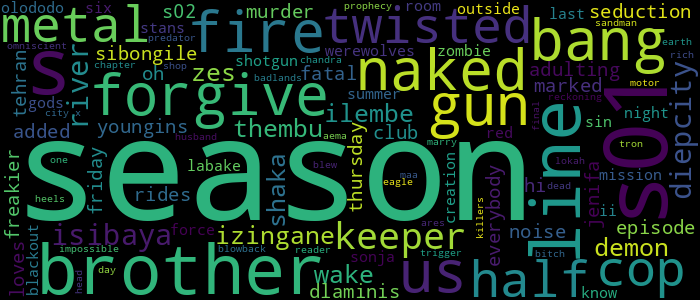

In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width=700, height=300, max_words=500, random_state=30).generate(str(movies))
wc.to_image()

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Creating a vocabulary for the tokenized datatset
vocab = sorted(set(token for sentence in wt_movies for token in sentence))

# Use oneHotEncoder to one-hot encode the vocabulary
encoder = OneHotEncoder(sparse_output=False, categories=[vocab])

one_hot_encoded_movies = []
for sentence in wt_movies:
    one_hot_encoded_sentence = encoder.fit_transform([[token] for token in sentence])
    one_hot_encoded_movies.append(one_hot_encoded_sentence)


In [ ]:
sample_idx = 43
print(len(wt_movies[sample_idx]),len(vocab))
one_hot_encoded_movies[sample_idx].shape


6 138


(6, 138)

In [ ]:
def compute_tf(document, word):
  return document.count(word) / len(document)

In [ ]:
wt_movies[10]

['my', 'brother', '’', 's', 'keeper', '(', 's02', ')']

In [ ]:
compute_tf(wt_movies[10], 'my')

0.125

In [ ]:
def compute_idf(word, movies):
  docs_containing_word = sum(1 for sentence in movies if word in sentence)
  return log(len(movies) / (1 + docs_containing_word))

In [ ]:
compute_idf('my', wt_movies)

2.580216829592325

In [ ]:
def compute_tf_idf(document, word, wt_movies):
  tf = compute_tf(document, word)
  idf = compute_idf(word, wt_movies)
  return tf * idf

In [ ]:
def sentence_tf_idf(w_movies, vocab):

  vector = []
  for word in wt_movies:
    vector.append(compute_tf_idf(wt_movies, word, vocab))

  return vector

In [ ]:
idx = 10
current_sentence_tokens = wt_movies[idx] # Explicitly get the list of tokens from wt_movies
print('sentence:', ' '.join(current_sentence_tokens))

vector = [compute_tf_idf(current_sentence_tokens, word, wt_movies) for word in current_sentence_tokens]

for i, score in enumerate(vector):
  print(f"{current_sentence_tokens[i]}: {score:.4f}")

sentence: my brother ’ s keeper ( s02 )
my: 0.3225
brother: 0.3864
’: 0.2997
s: 0.3225
keeper: 0.3864
(: -0.0019
s02: 0.4371
): -0.0019


In [ ]:
idx = 10
current_sentence_tokens = wt_movies[idx]

print(f"Type of current_sentence_tokens before join: {type(current_sentence_tokens)}")
print(f"Value of current_sentence_tokens before join: {current_sentence_tokens}")

print('sentence:', ' '.join(current_sentence_tokens))

vector = [compute_tf_idf(current_sentence_tokens, word, wt_movies) for word in current_sentence_tokens]

for i, score in enumerate(vector):
  print(f"{current_sentence_tokens[i]}: {score:.4f}")

Type of current_sentence_tokens before join: <class 'list'>
Value of current_sentence_tokens before join: ['my', 'brother', '’', 's', 'keeper', '(', 's02', ')']
sentence: my brother ’ s keeper ( s02 )
my: 0.3225
brother: 0.3864
’: 0.2997
s: 0.3225
keeper: 0.3864
(: -0.0019
s02: 0.4371
): -0.0019


In [ ]:
idx = 10
sentence_tokens = wt_movies[idx]
print('sentence:', ' '.join(sentence_tokens))

tf_idf_vector = [compute_tf_idf(sentence_tokens, word, wt_movies) for word in sentence_tokens]

for i, score in enumerate(tf_idf_vector):
  print(f"{sentence_tokens[i]}: {score:.4f}")

sentence: my brother ’ s keeper ( s02 )
my: 0.3225
brother: 0.3864
’: 0.2997
s: 0.3225
keeper: 0.3864
(: -0.0019
s02: 0.4371
): -0.0019


In [ ]:
vector

[0.32252710369904064,
 0.3863803066697895,
 0.29973690909979633,
 0.32252710369904064,
 0.3863803066697895,
 -0.0018797346705675699,
 0.43706344518331003,
 -0.0018797346705675699]

In [ ]:
!pip install gensim

In [ ]:
import gensim as gs
from gensim import corpora
from gensim.models import TfidfModel

dictionary = corpora.Dictionary(wt_movies)
corpus = [dictionary.doc2bow(sentence) for sentence in wt_movies]

tfidf_model = TfidfModel(corpus)

tfidf_vectors = [tfidf_model[bow] for bow in corpus]

In [ ]:
idx = 10
sentence  = wt_movies[idx]
print('sentence:', ' '.join(sentence))

for word_id, score in tfidf_vectors[idx]:
  print(f"{dictionary[word_id]}: {score:.4f}")

sentence: my brother ’ s keeper ( s02 )
brother: 0.4358
keeper: 0.4358
my: 0.3494
s: 0.3494
s02: 0.5222
’: 0.3216


In [ ]:
# Comparing sentences

sample_idx_1 = 10
sample_idx_2 = 15

print(f"sentence 1: {''.join(wt_movies[sample_idx_1])}")
print(f"sentence 2: {''.join(wt_movies[sample_idx_2])}")

similarity = gs.matutils.cossim(vec1=tfidf_vectors[sample_idx_1],
                                vec2=tfidf_vectors[sample_idx_2]
                                )

print(f"similarity: {similarity}")

sentence 1: mybrother’skeeper(s02)
sentence 2: theriver(season3)
similarity: 0.0


In [ ]:
# word embedding

!gdown 0B7XkCwpI5KDYNlNUTTlSS21pQmM

Downloading...
From (original): https://drive.google.com/uc?id=0B7XkCwpI5KDYNlNUTTlSS21pQmM
From (redirected): https://drive.google.com/uc?id=0B7XkCwpI5KDYNlNUTTlSS21pQmM&confirm=t&uuid=699a44f8-6272-4861-9653-0ba921dd01f1
To: /content/GoogleNews-vectors-negative300.bin.gz
100% 1.65G/1.65G [00:23<00:00, 68.8MB/s]


In [ ]:
!gunzip GoogleNews-vectors-negative300.bin.gz

gzip: GoogleNews-vectors-negative300.bin already exists; do you wish to overwrite (y or n)? y


In [ ]:
from gensim.models import KeyedVectors

# Loading pre-trained word embeddings
word_vectors = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)

In [ ]:
def get_gensim_embeddings(wt_sentence):
    embeddings = []
    for word in wt_sentence:
        if word in word_vectors:
            embeddings.append(word_vectors[word])
    return embeddings

In [ ]:
import numpy as np
gensim_embeddings = get_gensim_embeddings(wt_movies[0])
print(np.shape(gensim_embeddings))

(2, 300)


In [ ]:
def gensim_similarity(word1, word2):
    if word1 in word_vectors and word2 in word_vectors:
        return word_vectors.similarity(word1, word2)
    return 0

In [ ]:
print(gensim_similarity("season", "episode"))

0.25772732


In [ ]:
print(gensim_similarity("season", "seasons"))

0.7297241
